In [1]:
!pip install essentia
!apt-get install lilypond
!pip uninstall matplotlib
!pip install matplotlib==2.2.2

     |████████████████████████████████| 12.0MB 4.8MB/s 
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-droid-fallback fonts-lmodern fonts-noto-mono ghostscript gsfonts
  libauthen-sasl-perl libcupsfilters1 libcupsimage2 libdata-dump-perl
  libencode-locale-perl libfile-listing-perl libfont-afm-perl libgs9
  libgs9-common libhtml-form-perl libhtml-format-perl libhtml-parser-perl
  libhtml-tagset-perl libhtml-tree-perl libhttp-cookies-perl
  libhttp-daemon-perl libhttp-date-perl libhttp-message-perl
  libhttp-negotiate-perl libijs-0.35 libio-html-perl libio-socket-ssl-perl
  libjbig2dec0 libkpathsea6 liblwp-mediatypes-perl liblwp-protocol-https-perl
  libmailtools-perl libnet-http-perl libnet-smtp-ssl-perl libnet-ssleay-perl
  libpotrace0 libptexe

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
GLOBAL_PATH = '/content/drive/MyDrive/TFG'  

Mounted at /content/drive


In [69]:
import pandas as pd
from sklearn import preprocessing
import seaborn as sns
from IPython.display import Image

import importlib
import joblib
import shutil
import sys
importlib.reload(sys.modules['drums'])

sys.path.append(GLOBAL_PATH + '/scripts')
from utils import *
from feature_extraction import *
from drums import *
from plots import *
from visualization import *

sr = 44100

In [92]:
folder = GLOBAL_PATH + "/data/Testing/student/"
musical_feature_file = folder + 'Test_student_ex1'
bpm=60
lilypond = folder + "Ex1_" + str(bpm) + ".ly"
annotation_file = folder +  "test_ex1_" + str(bpm) + ".txt"

#musical_feature_file = folder + 'GoldLion.csv'

prev_files = get_files_in_dir(folder + 'slices')
for f in prev_files:
  os.remove(f)
  

validation_features = []
with open(GLOBAL_PATH + '/data/features/features_used.txt') as f:
    used_features = f.read().splitlines()
f.close
for feature in used_features:
  validation_features.append("lowlevel." + feature)


audiofiles = get_files_in_dir(folder)
audiofiles = [x.split('/')[-1] for x in audiofiles if 'aif' in x]
audiofiles

#separate audio files in exercises 
exercises = []
for i in range(7):
    ex_list = []
    for j in range(4):
      ex_list.append(audiofiles[i + 7*j])
    exercises.append(ex_list)

test_exercises = exercises[0]

exercises

[['bad_bad#01.aif', 'bad_good#01.aif', 'good_bad#01.aif', 'good_good#02.aif'],
 ['bad_bad#03.aif', 'bad_good#02.aif', 'good_bad#04.aif', 'good_good#04.aif'],
 ['bad_bad#04.aif', 'bad_good#05.aif', 'good_bad#05.aif', 'good_good#05.aif'],
 ['bad_bad#06.aif', 'bad_good#08.aif', 'good_bad#08.aif', 'good_good#06.aif'],
 ['bad_bad#07.aif', 'bad_good#09.aif', 'good_bad#09.aif', 'good_good#08.aif'],
 ['bad_bad#09.aif', 'bad_good#11.aif', 'good_bad#11.aif', 'good_good#12.aif'],
 ['bad_bad#10.aif', 'bad_good#14.aif', 'good_bad#12.aif', 'good_good#17.aif']]

['/content/drive/MyDrive/TFG/data/Testing/student/slices/10__blind.wav', '/content/drive/MyDrive/TFG/data/Testing/student/slices/11__blind.wav', '/content/drive/MyDrive/TFG/data/Testing/student/slices/12__blind.wav', '/content/drive/MyDrive/TFG/data/Testing/student/slices/13__blind.wav', '/content/drive/MyDrive/TFG/data/Testing/student/slices/14__blind.wav', '/content/drive/MyDrive/TFG/data/Testing/student/slices/15__blind.wav', '/content/drive/MyDrive/TFG/data/Testing/student/slices/16__blind.wav', '/content/drive/MyDrive/TFG/data/Testing/student/slices/17__blind.wav', '/content/drive/MyDrive/TFG/data/Testing/student/slices/18__blind.wav', '/content/drive/MyDrive/TFG/data/Testing/student/slices/19__blind.wav', '/content/drive/MyDrive/TFG/data/Testing/student/slices/210__blind.wav', '/content/drive/MyDrive/TFG/data/Testing/student/slices/211__blind.wav', '/content/drive/MyDrive/TFG/data/Testing/student/slices/212__blind.wav', '/content/drive/MyDrive/TFG/data/Testing/student/slices/213_

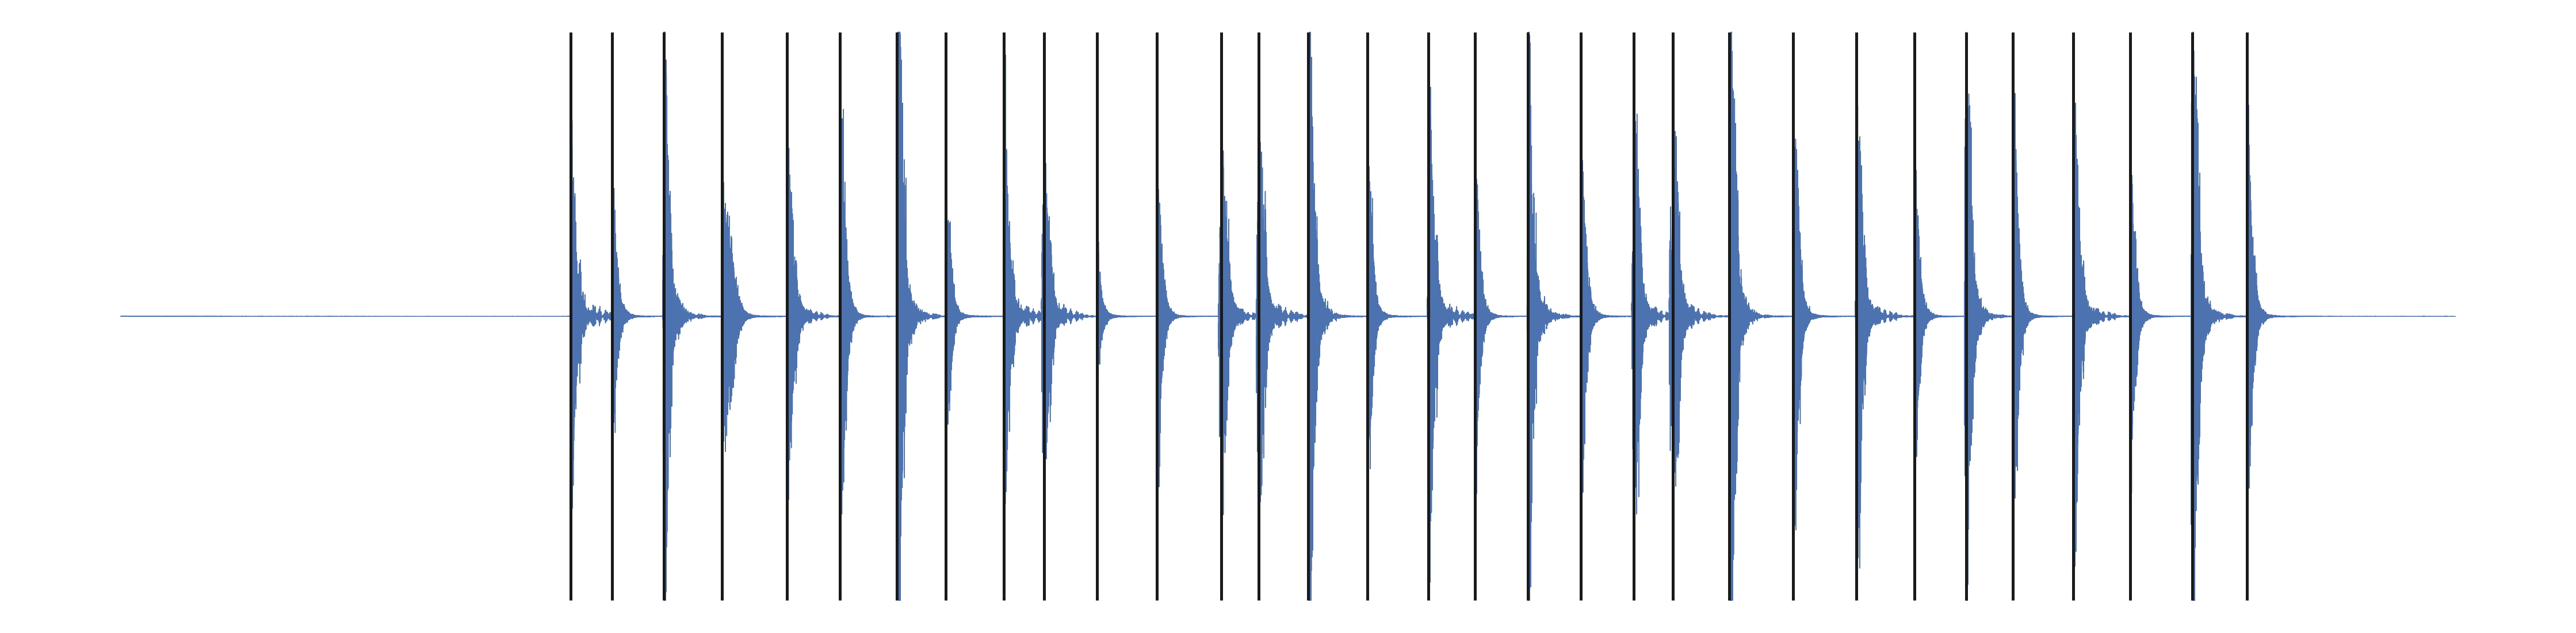

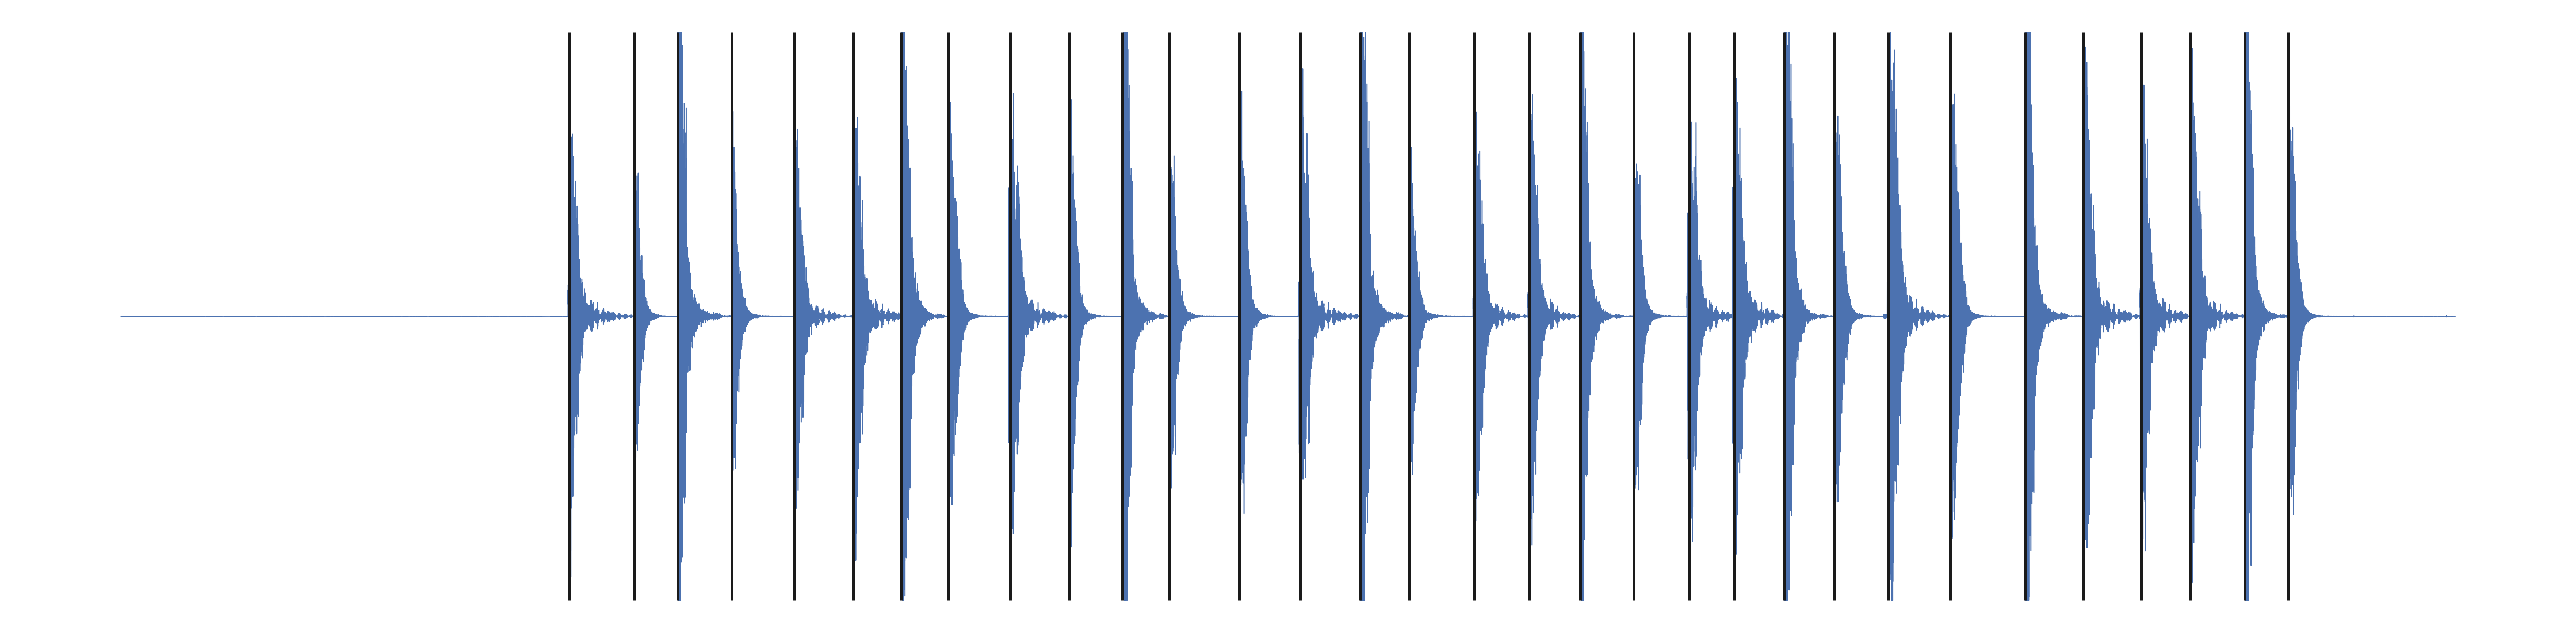

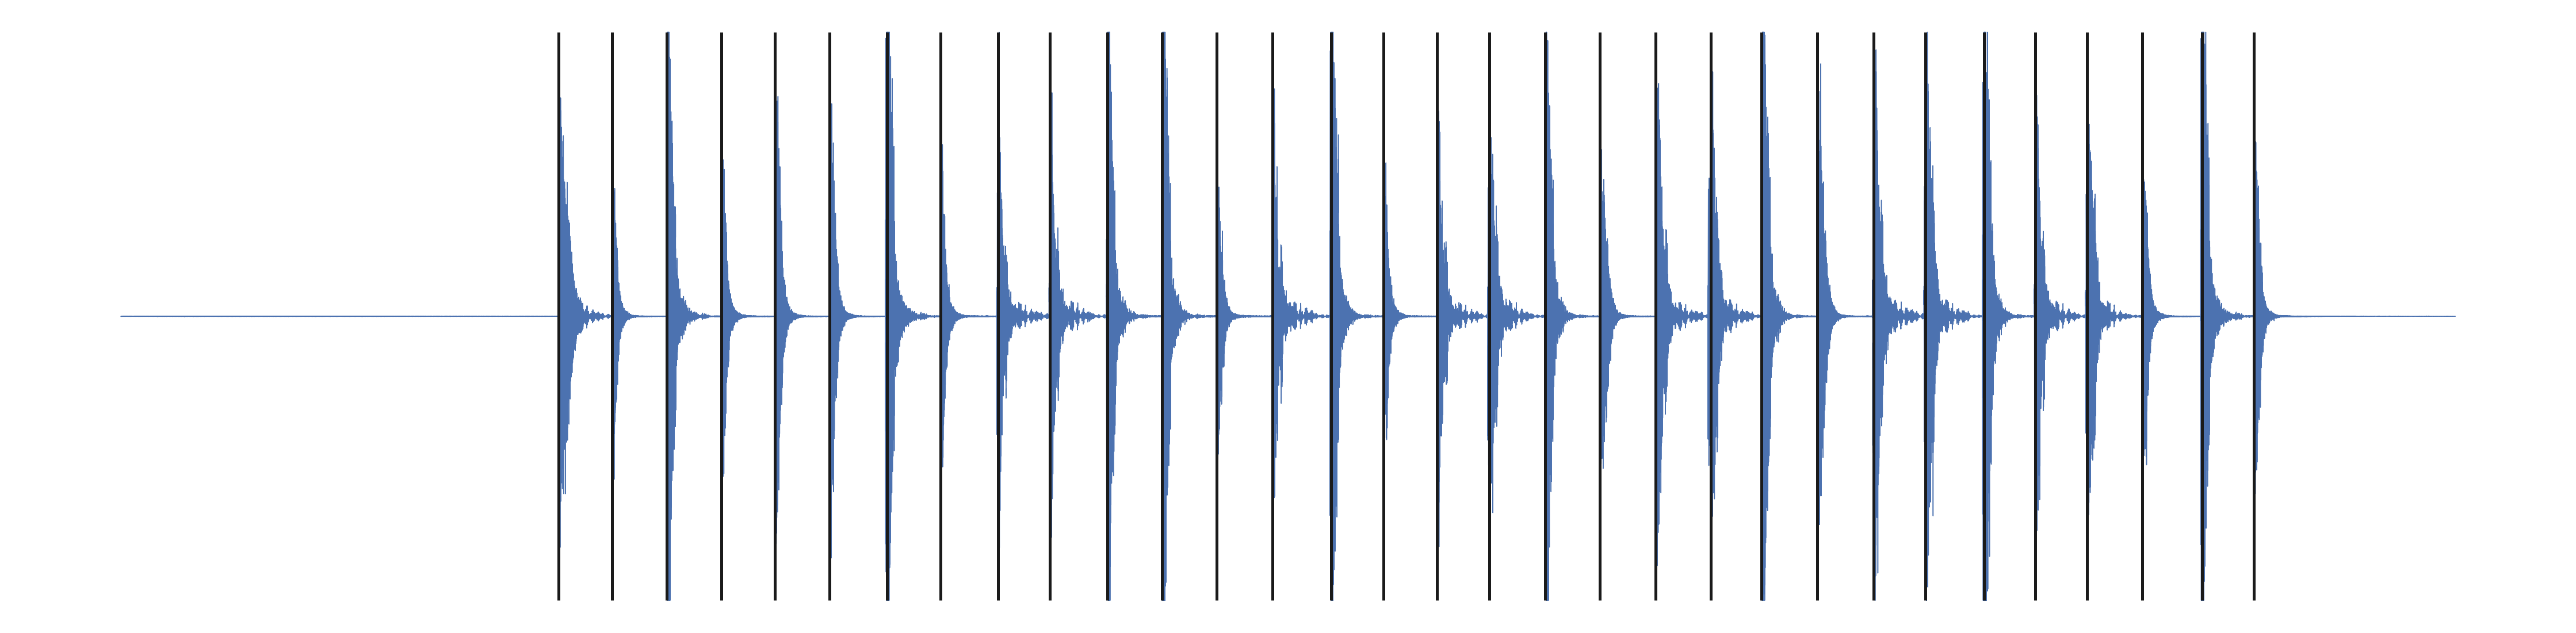

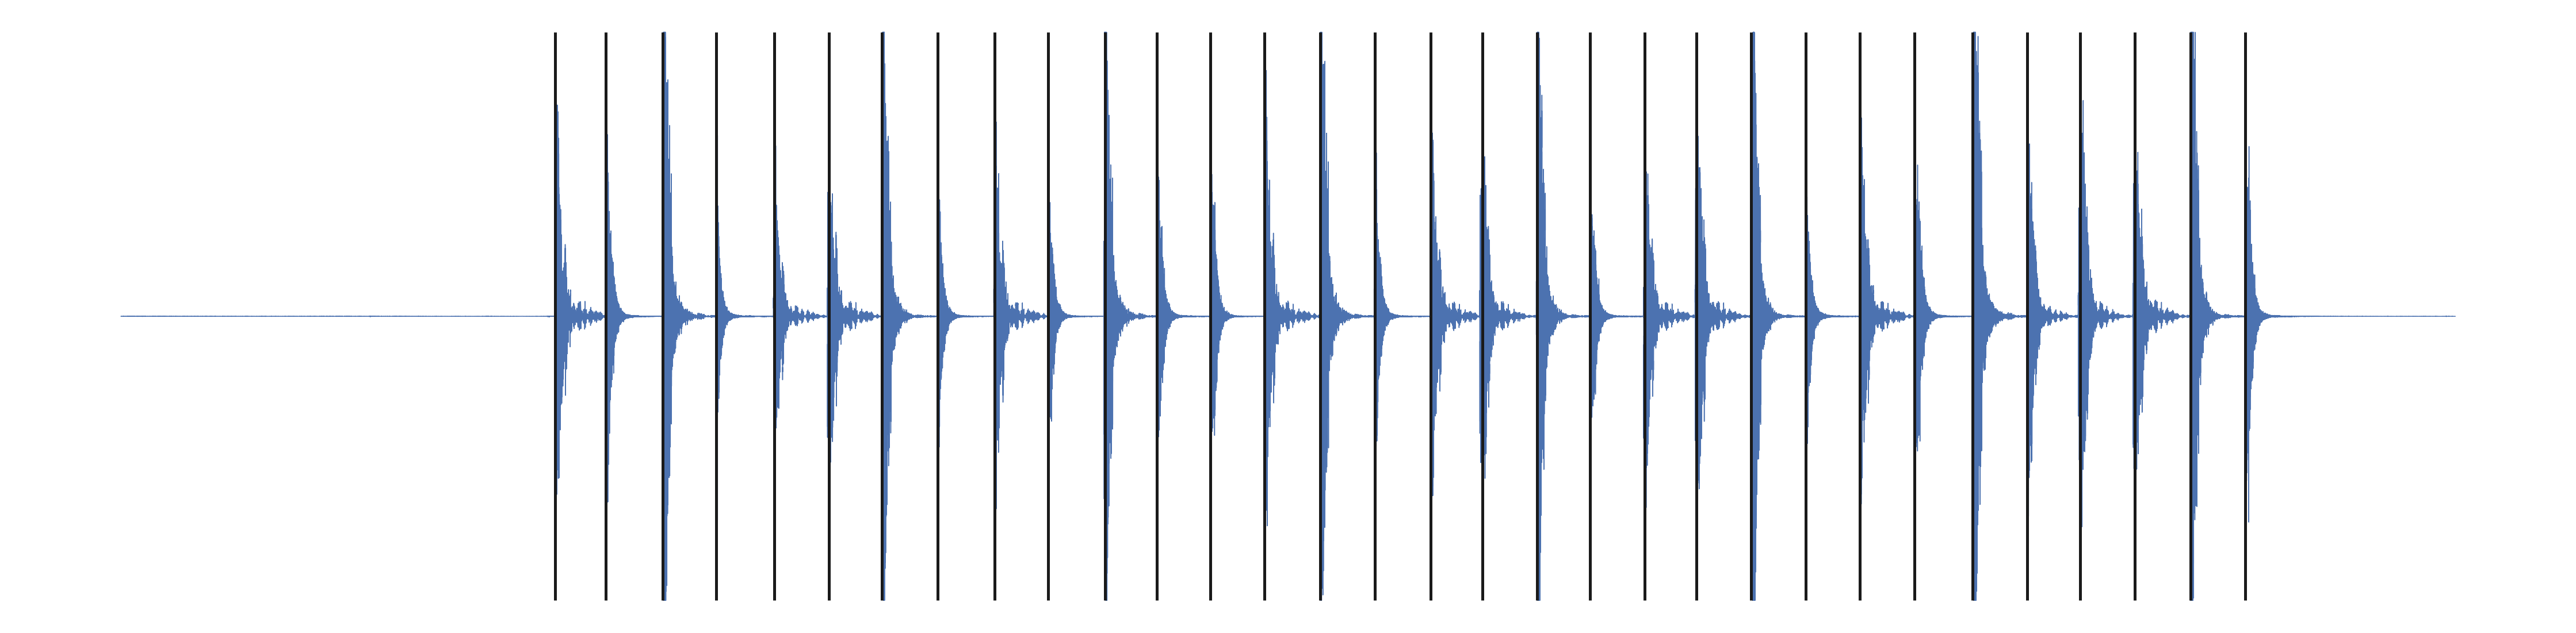

In [93]:
importlib.reload(sys.modules['drums'])
from drums import *
results = dict()
legend = dict()

annotations = get_Annotations_list_from_file(annotation_file, legend, sr)
descriptors = get_lowLevelDescriptors(GLOBAL_PATH + '/data/test.wav')

for audio_file in test_exercises:
  prev_files = get_files_in_dir(folder + 'slices')
  for f in prev_files:
    os.remove(f)
  name = audio_file.split('.')[0]
  results[name] = dict()
  results[name]['audiofile'] = audio_file
  results[name]['onsets'] = SliceDrums_BeatDetection(folder=folder, audio_filename=audio_file, fs=sr)
  results[name]['features_file'] = '{}_{}_{}.csv'.format(musical_feature_file, str(bpm), name)
  file_count = extract_MusicalFeatures(folder + 'slices', validation_features, results[name]['features_file'])


In [71]:
min_max_scaler = preprocessing.MinMaxScaler()
std_scaler = preprocessing.StandardScaler()

min_max_scaler = joblib.load(GLOBAL_PATH + '/models/minmax.pck')
std_scaler = joblib.load(GLOBAL_PATH + '/models/std_scaler.pck')
events = [x[1].lower() for x in annotations]
expected = [x[0] for x in annotations]
for key in results:
  data = pd.read_csv(results[key]['features_file'])
  data_modif = data.copy()
  X_ = data_modif.iloc[:].values 
  X_ = min_max_scaler.transform(X_[:,:-1])
  X_ = std_scaler.transform(X_)

  X_test = X_

  results[key]['X_test'] = X_test

In [72]:
model = joblib.load(GLOBAL_PATH + '/models/SVM.pck')

for key in results:
  results[key]['y_pred'] = model.predict(results[key]['X_test'])

bad_bad#01
	Balanced accuracy:  0.7004662004662005
	Accuracy:  0.71875
	Precision:  0.8447916666666667
	F-score:  0.7490245261984391


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1859: UserWarning:

y_pred contains classes not in y_true



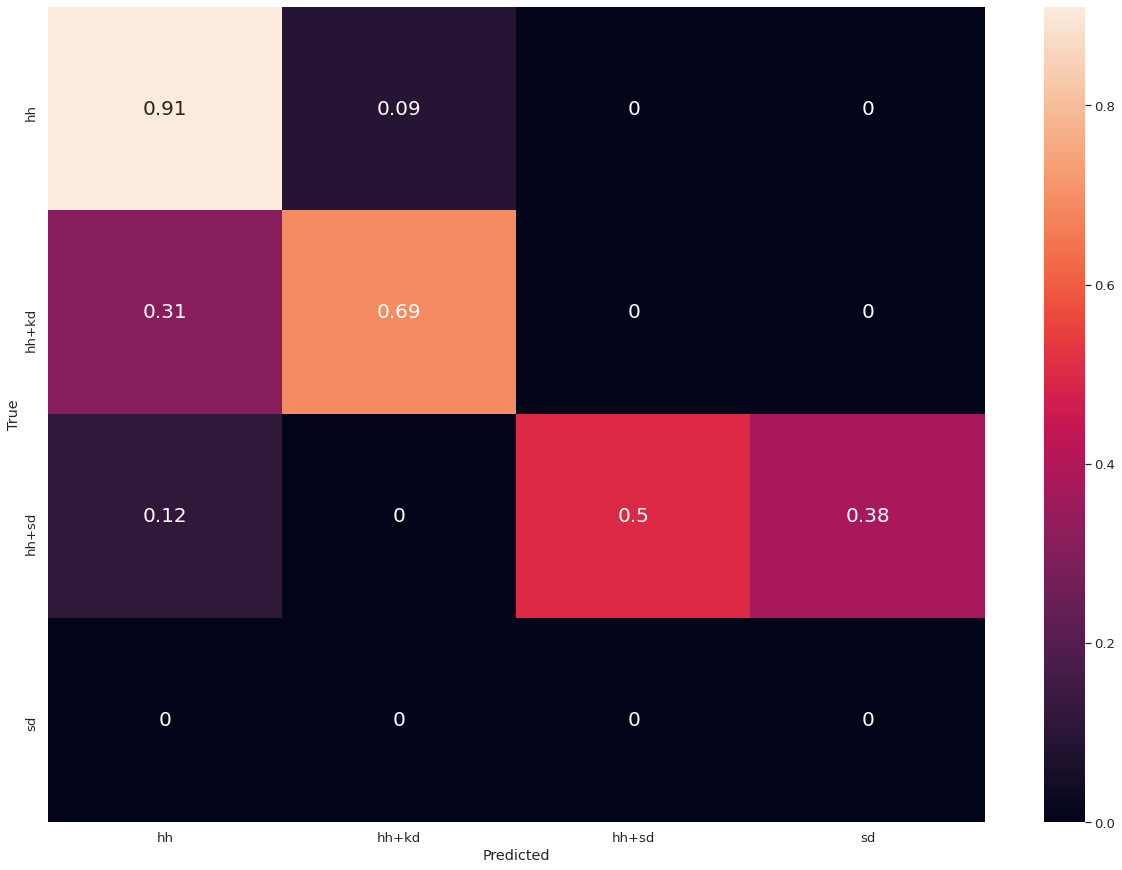

bad_good#01
	Balanced accuracy:  0.8333333333333334
	Accuracy:  0.875
	Precision:  0.9709821428571428
	F-score:  0.9016203703703703


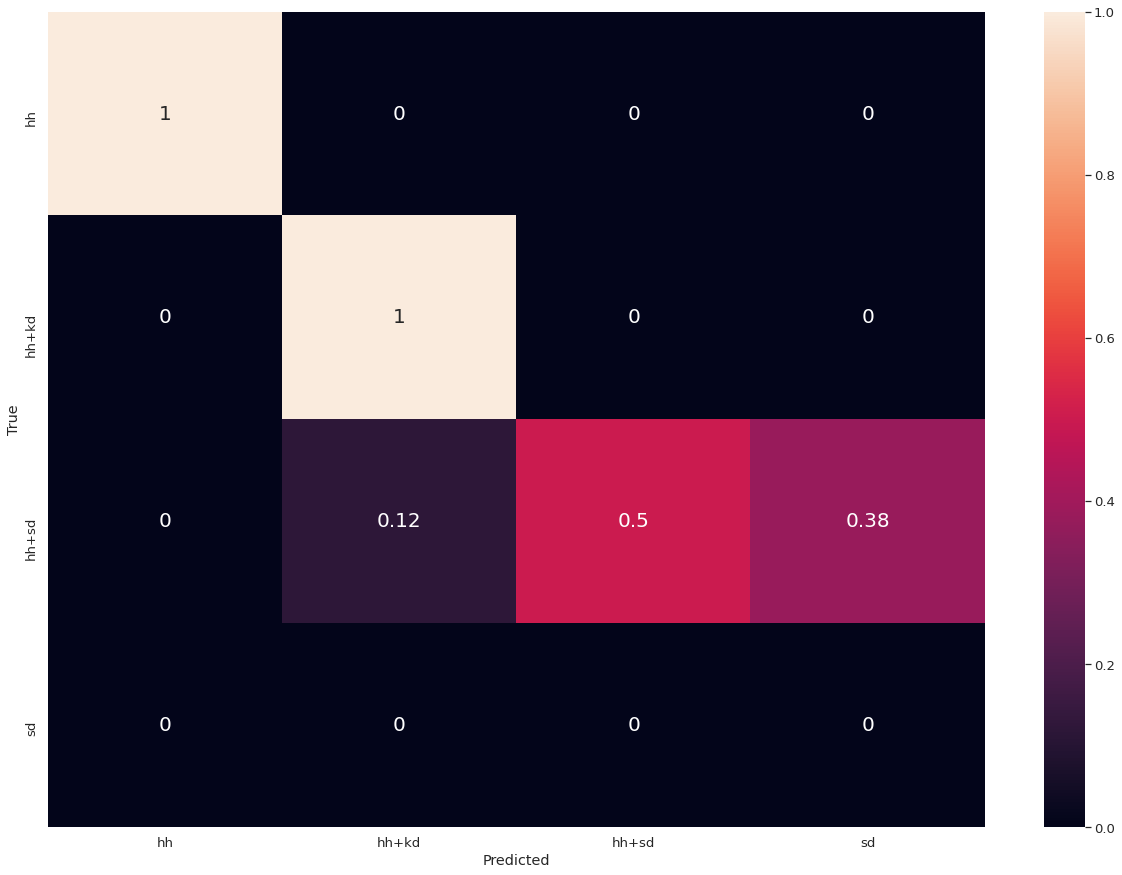

good_bad#01
	Balanced accuracy:  0.5405011655011656
	Accuracy:  0.59375
	Precision:  0.8385416666666667
	F-score:  0.6305555555555555


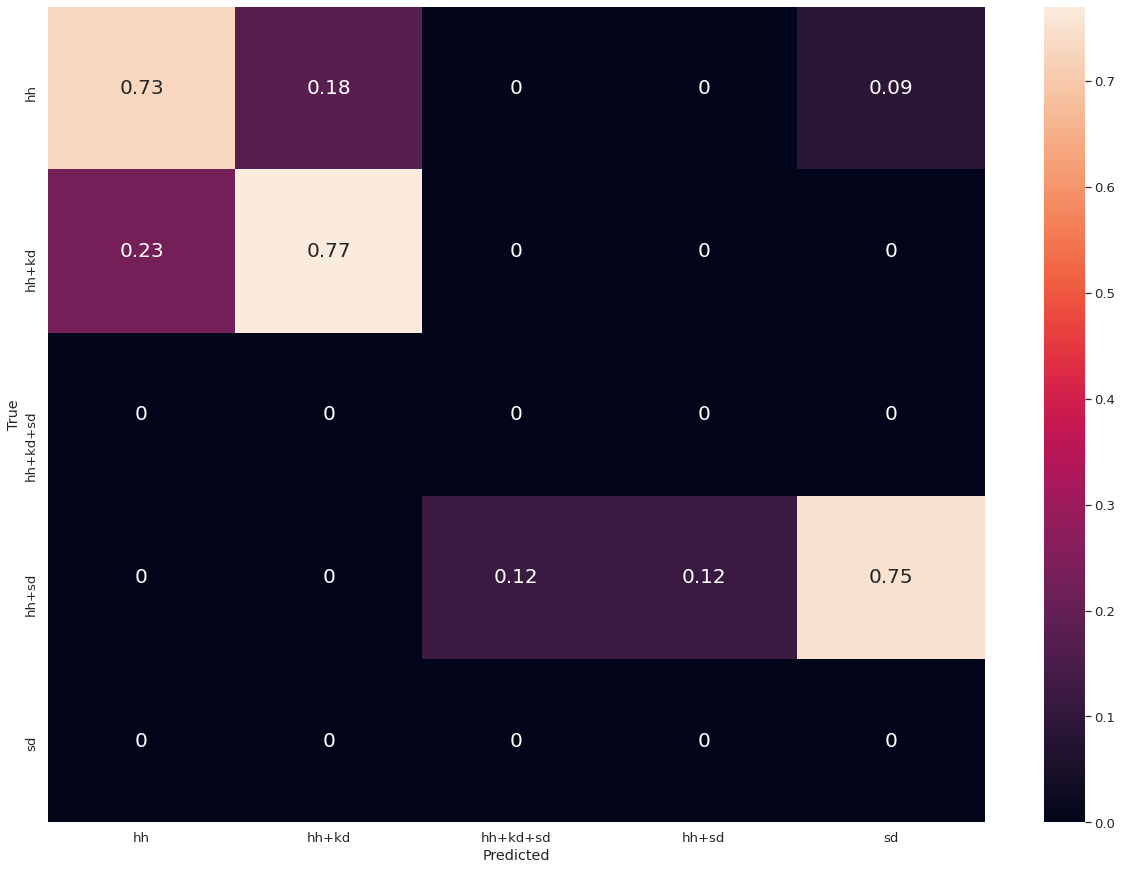

good_good#02
	Balanced accuracy:  0.7243589743589745
	Accuracy:  0.78125
	Precision:  1.0
	F-score:  0.83375


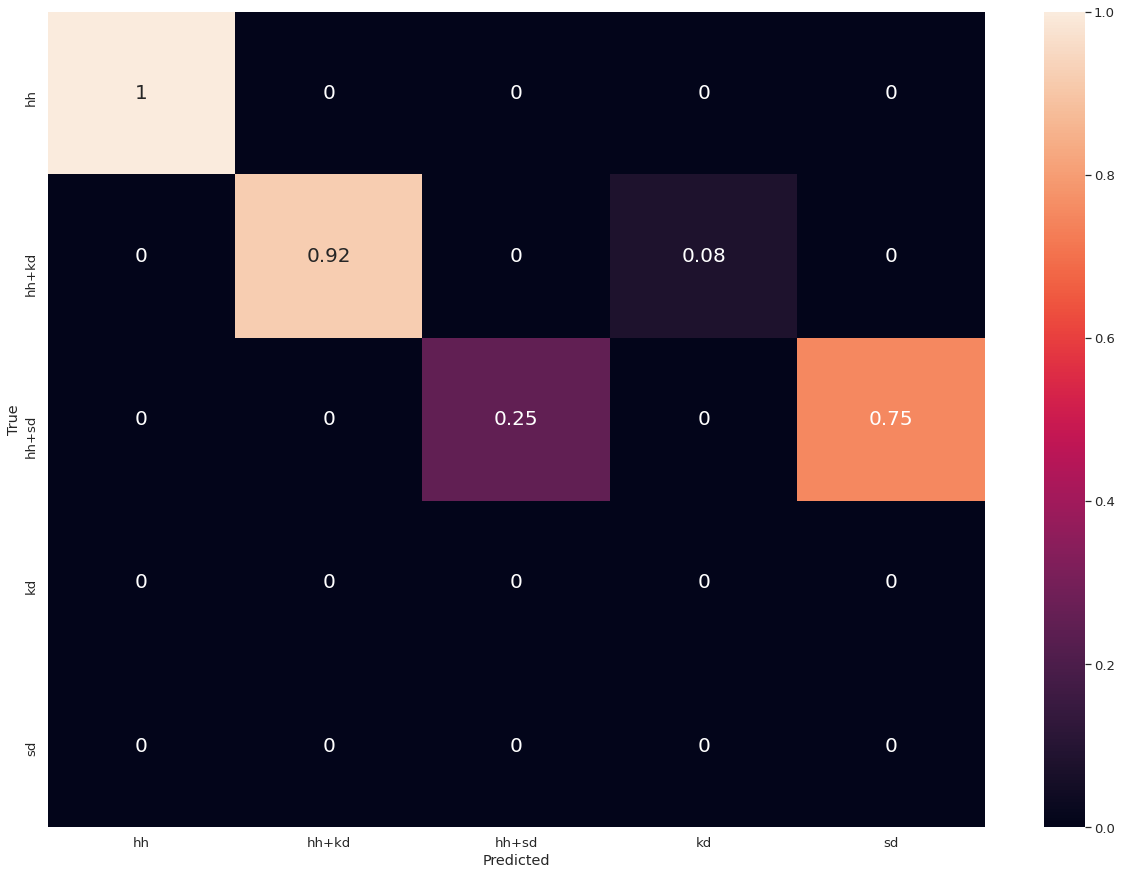

In [73]:
import sklearn.metrics as metric
from sklearn.metrics import confusion_matrix
# we assume that audio has 4 beats of countback and 1st onset then
left_time = 4*60/bpm

# It's just a draft. you should use more justified approach.
right_time = left_time + 60.0/bpm*16
for key in results:
  if len(events) != len(results[key]['y_pred']):
    y_pred_ = map_onsets_with_events(results[key]['onsets'][0] ,np.array(expected) + left_time, results[key]['y_pred'])
  else: 
    y_pred_ = results[key]['y_pred']
  results[key]['y_pred_mapped'] = y_pred_
  print(key)
  print('\tBalanced accuracy: ', metric.balanced_accuracy_score(events, y_pred_))
  print('\tAccuracy: ', metric.accuracy_score(events, y_pred_))
  print('\tPrecision: ', metric.precision_score(events, y_pred_, average = 'weighted'))
  print('\tF-score: ', metric.f1_score(events, y_pred_, average = 'weighted'))
  le = preprocessing.LabelEncoder()
  # classes predicted and expected
  classes = np.unique(np.concatenate([np.unique(y_pred_), np.unique(events)]))
  values_list = range(len(classes))
  zip_iterator = zip(classes, values_list)
  classes_dictionary = dict(zip_iterator)
  conf_mat = pd.DataFrame(confusion_matrix(events, y_pred_, normalize='true'), columns = classes_dictionary, index = classes_dictionary).round(2)
  conf_mat.index.name = 'True'
  conf_mat.columns.name = 'Predicted'
  plt.figure(figsize = (21,15))
  sns.set(font_scale = 1.2)
  sns.heatmap(conf_mat, annot_kws = {"size": 20}, annot = True);
  plt.show()

bad_bad#01


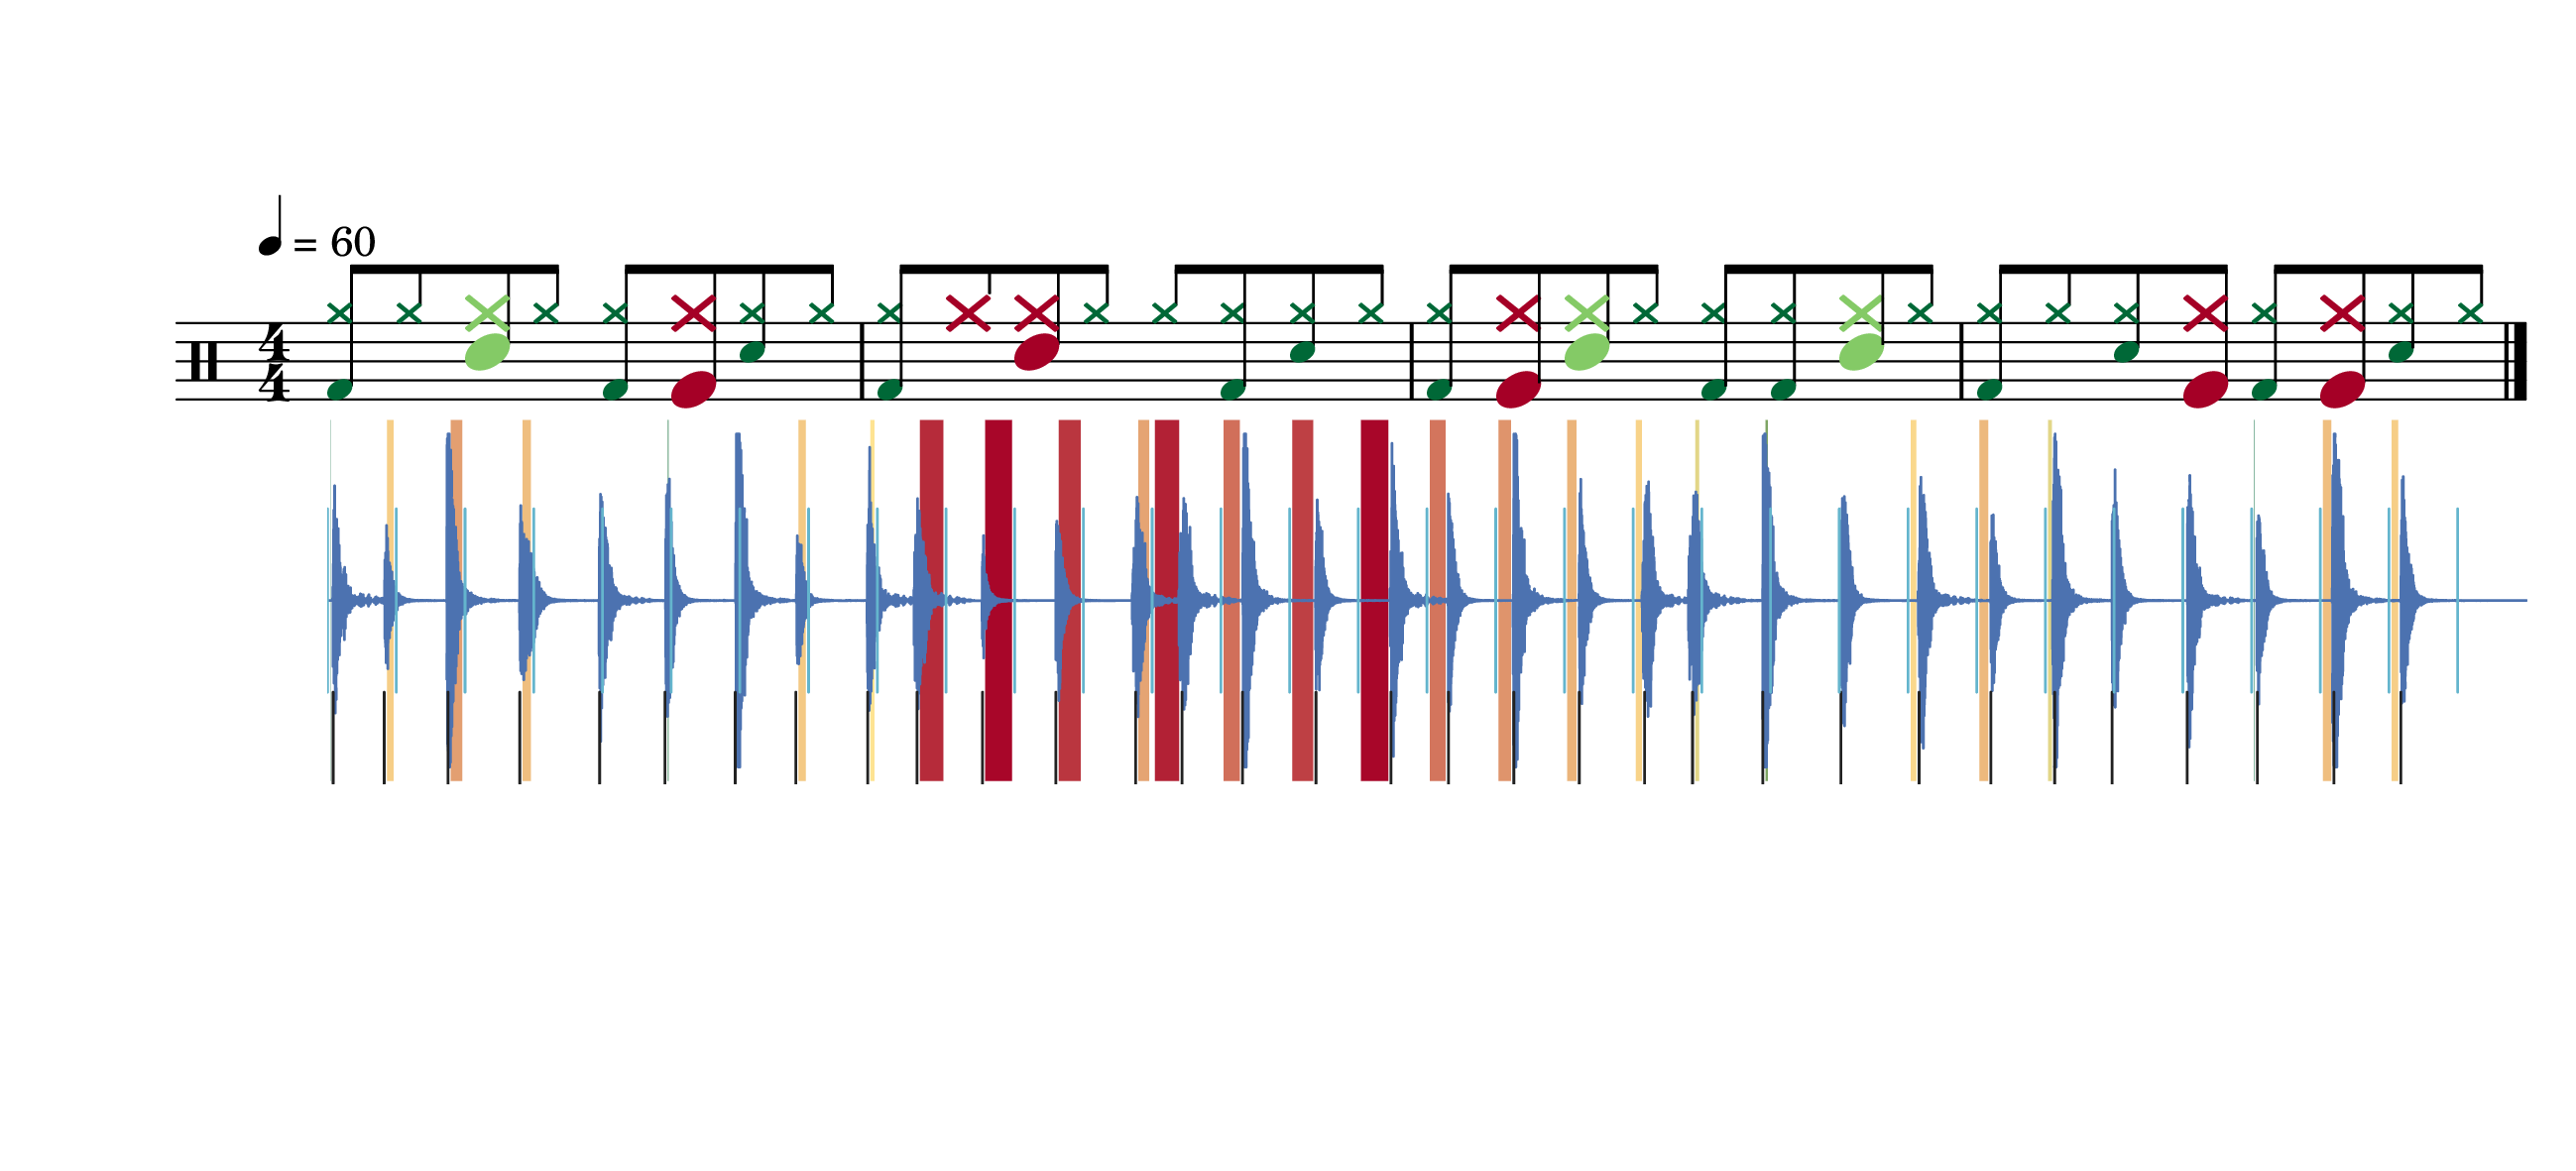

bad_good#01


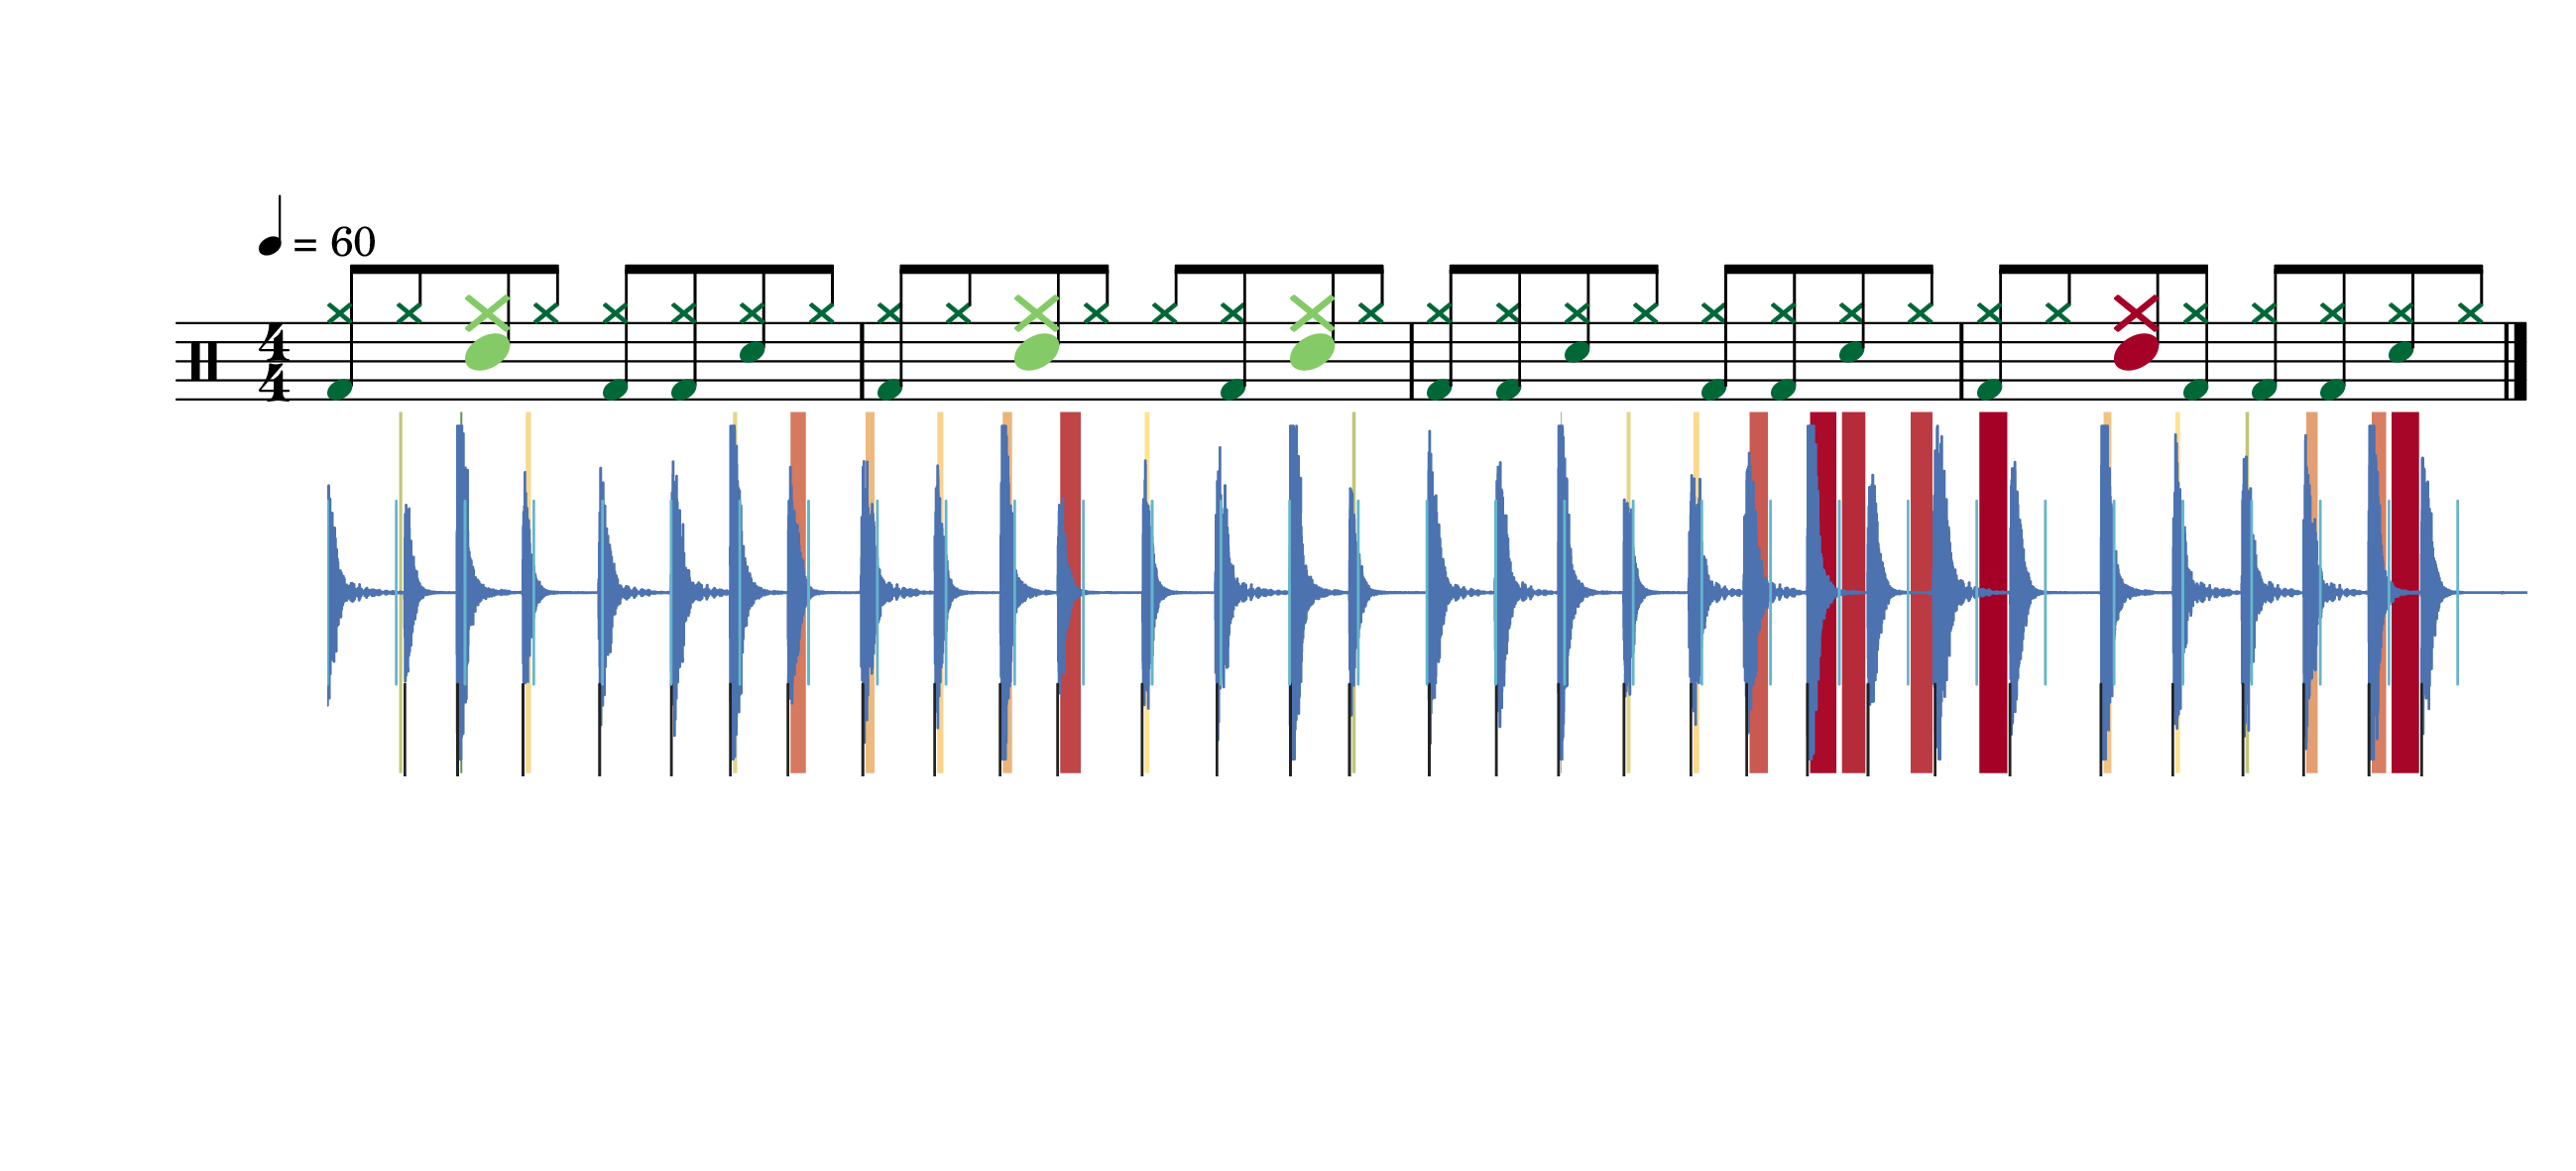

/content/drive/MyDrive/TFG/scripts/feature_extraction.py:49: RuntimeWarning:

invalid value encountered in double_scalars

/content/drive/MyDrive/TFG/scripts/feature_extraction.py:50: RuntimeWarning:

invalid value encountered in double_scalars



good_bad#01


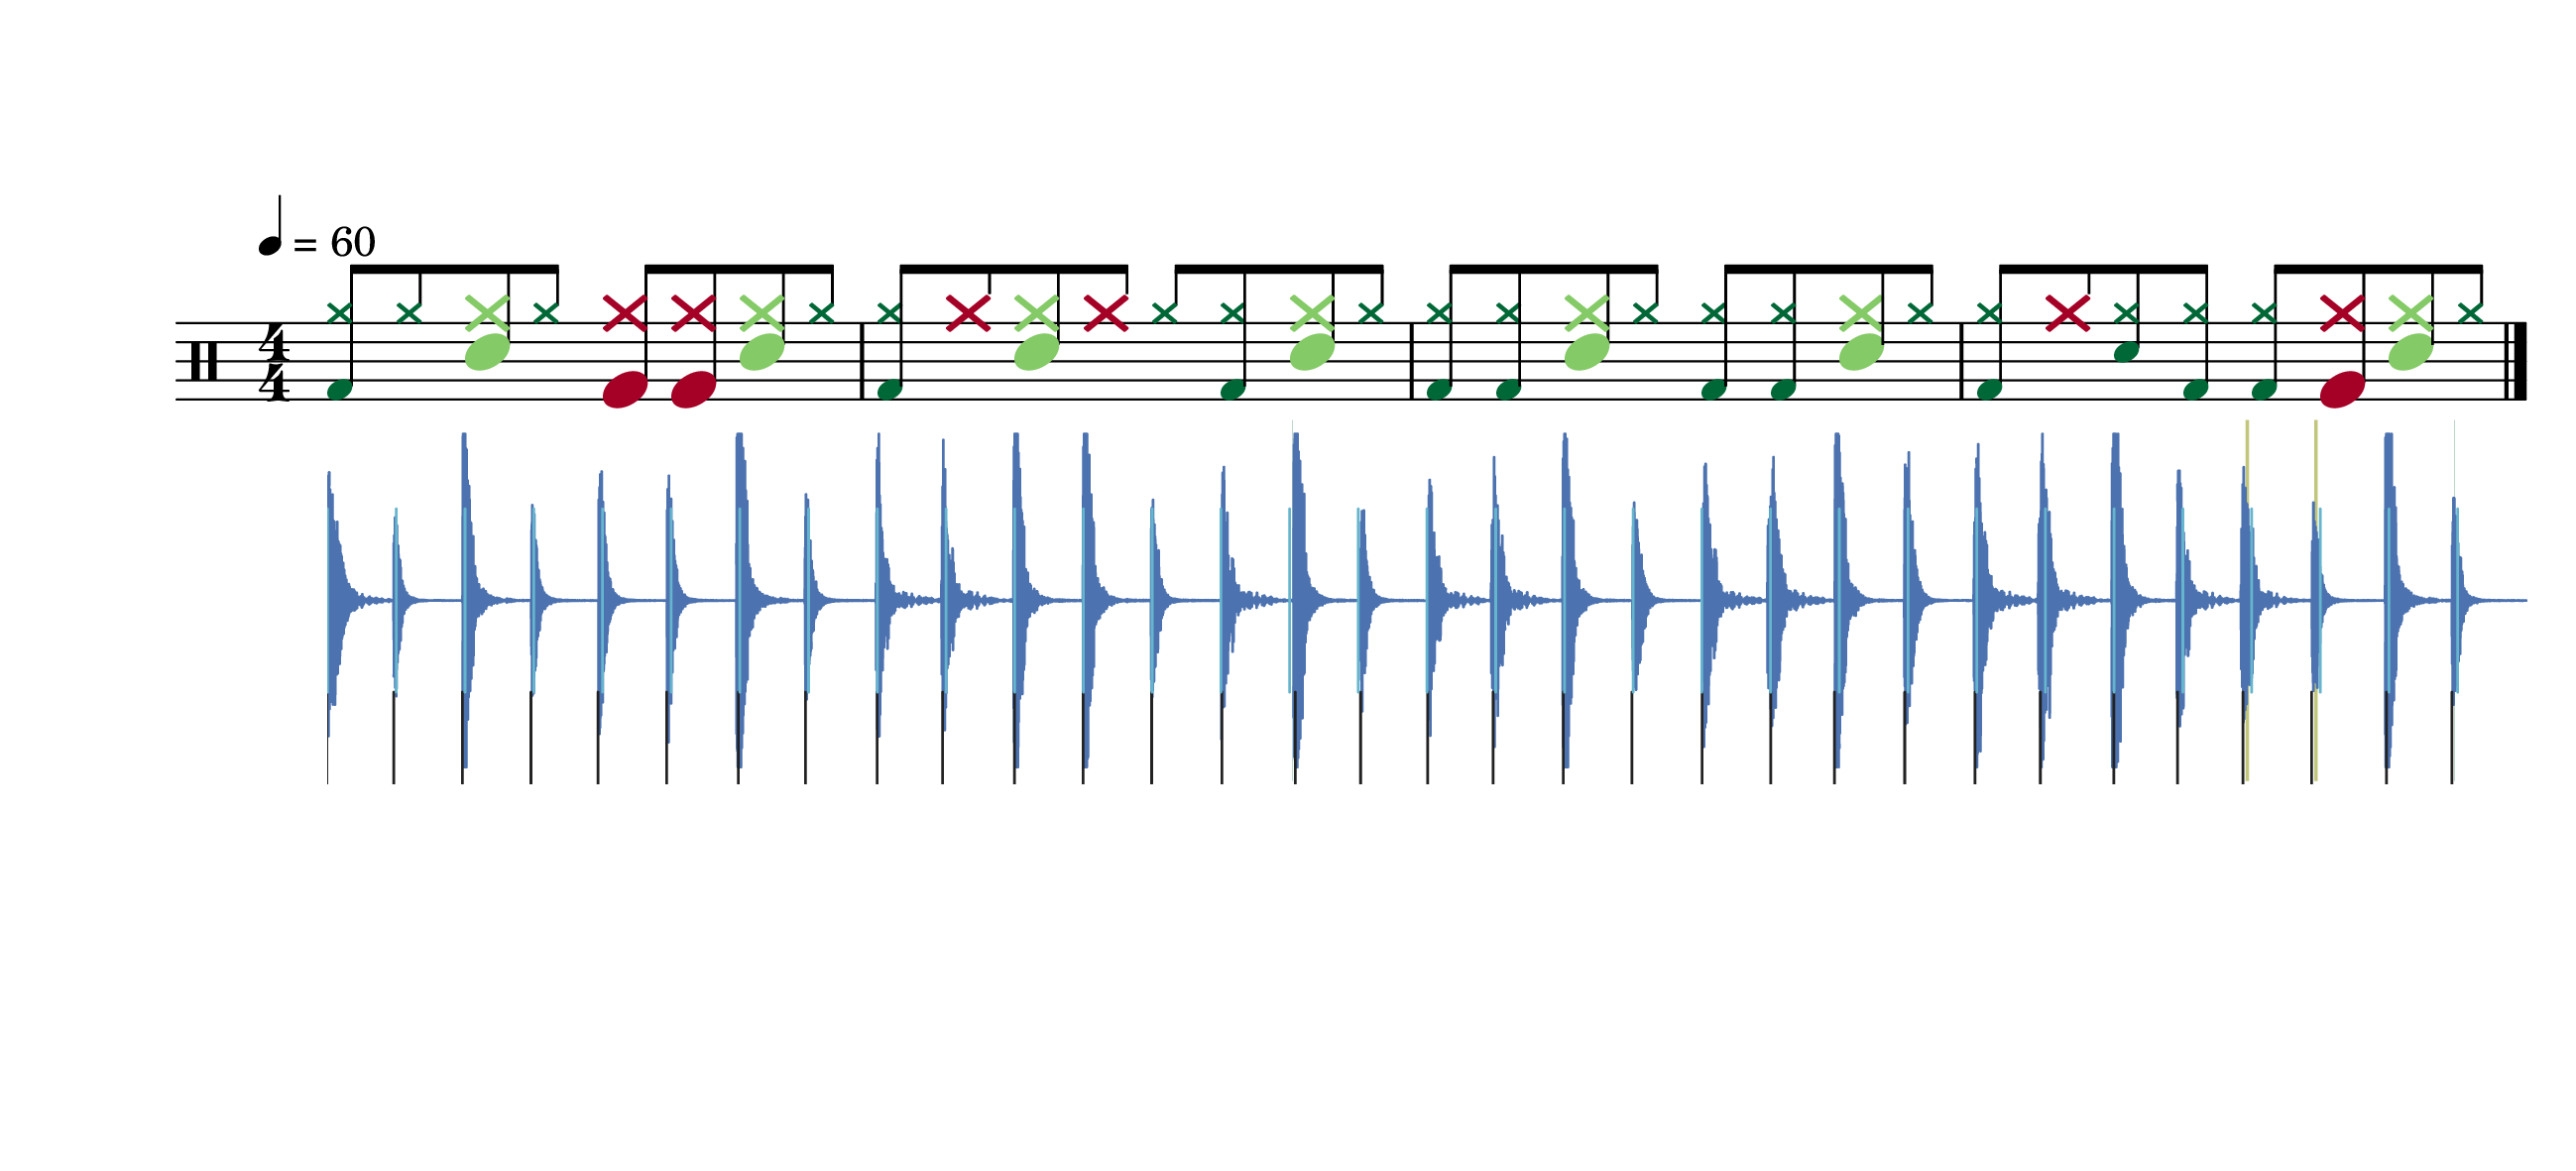

good_good#02


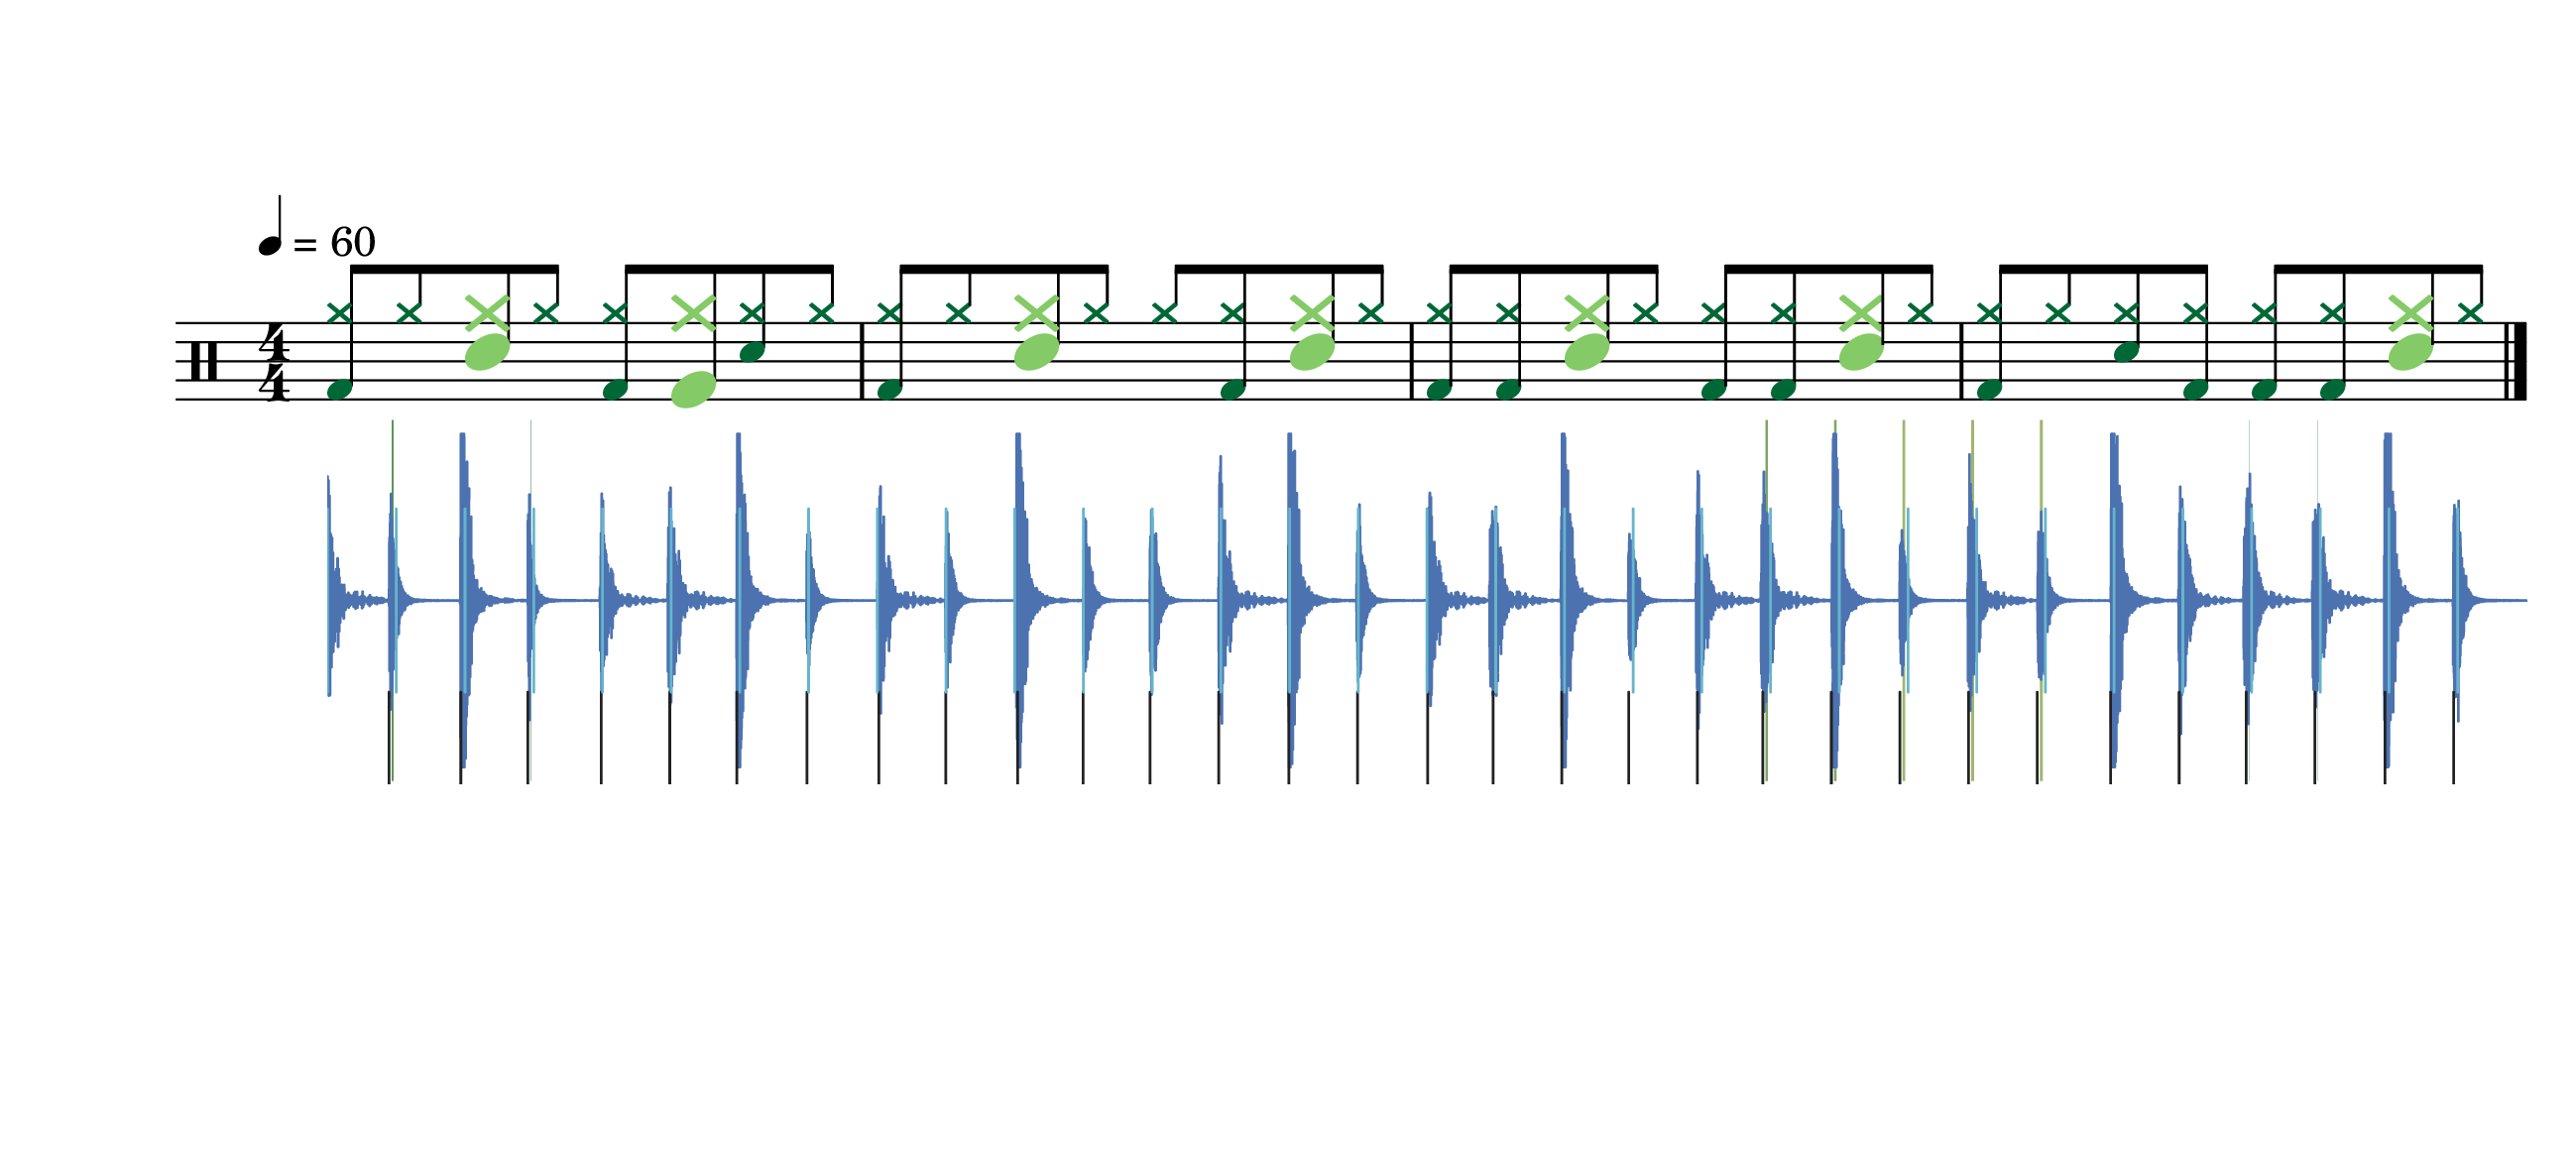

In [74]:
expected = [x[0] for x in annotations]
lilypond_basedir = os.path.dirname(lilypond)
lilypond_shortname = os.path.basename(lilypond)
# we assume that audio has 4 beats of countback and 1st onset then
left_time = 4*60/bpm

# we assume that audio has 4 bars
right_time = left_time + 60.0/bpm*16
for key in results:
  audio = ess.MonoLoader(filename= folder + results[key]['audiofile'])()
  onsets = results[key]['onsets'][0]
  y_pred = results[key]['y_pred']

  half_ibi = (onsets[1:] - onsets[:-1]).mean() / 2
  start = max(expected[0] - half_ibi, 0)
  end = expected[-1] + half_ibi

  devs = attack_deviations(expected, onsets, start, end)
  results[key]['devs'] = devs
  time_statistics = timing_statistics(devs)
  results[key]['timing_statistics'] = timing_statistics

  eps_lambda = lambda first_bar, last_bar, w, h, left_border_shift, right_border_shift:\
          save_bar_plot(audio, np.array(expected, dtype=float) ,left_time=left_time + first_bar*60/bpm,right_time=left_time + last_bar*60/bpm,fs=44100, w=6, h=1, dpi=150,
          actual_attacks=np.array(onsets, dtype=float),color_func=attack_rgba) #defining a macro that plot the wave form in lilypond
  
  notes_assessed = assess_notes(events, results[key]['y_pred_mapped'])
  print(key)
  file_img_name = score_image(lilypond_basedir,lilypond_shortname,notes_assessed,eps_lambda=eps_lambda,image_format='png') # get the lilypond file with the macros
  result_image = Image(filename=file_img_name)
  display(result_image) #display the result in console
  shutil.move(file_img_name, folder + 'results/' + key + '.png' )